<a href="https://colab.research.google.com/github/iamprathameshajmire/Text-Generator/blob/master/Automatic_Text_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras import regularizers
import tensorflow.keras.utils as k_utils
import numpy as np

In [0]:
tokenizer= Tokenizer()

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

--2020-04-19 18:10:58--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.144, 2607:f8b0:4004:815::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-04-19 18:10:58 (144 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
data = open('/tmp/sonnets.txt').read()

In [0]:
corpus = data.lower().split('\n')

In [0]:
tokenizer.fit_on_texts(corpus)

In [0]:
total_words = len(tokenizer.word_index) +1

In [0]:
total_words

3211

In [0]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [0]:
max_length = max((len(x) for x in input_sequences))

In [0]:
input_sequences = np.array(pad_sequences(input_sequences,maxlen=max_length,padding='pre'))

In [0]:
input_sequences

array([[   0,    0,    0, ...,    0,   34,  417],
       [   0,    0,    0, ...,   34,  417,  877],
       [   0,    0,    0, ...,  417,  877,  166],
       ...,
       [   0,    0,    0, ...,  493,  493, 3210],
       [   0,    0,    0, ...,  493, 3210,   15],
       [   0,    0,    0, ..., 3210,   15,   14]], dtype=int32)

In [0]:
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]
ys = k_utils.to_categorical(labels,num_classes=total_words)

In [0]:
model = Sequential()
model.add(Embedding(total_words,100,input_length=max_length-1))
model.add(Bidirectional(LSTM(150,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words/2,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 200)               320800    
_________________________________________________________________
dense_8 (Dense)              (None, 1605)              322605    
_________________________________________________________________
dense_9 (Dense)              (None, 3211)              5156866   
Total params: 6,422,571
Trainable params: 6,422,571
Non-trainable params: 0
____________________________________________

In [0]:
history = model.fit(xs,
                    ys,
                    epochs=150,
                    verbose=1)

Epoch 1/150
484/484 [==============================] - 7s 14ms/step - loss: 6.9857 - accuracy: 0.0220
Epoch 2/150
484/484 [==============================] - 7s 14ms/step - loss: 6.5108 - accuracy: 0.0213
Epoch 3/150
484/484 [==============================] - 7s 14ms/step - loss: 6.4089 - accuracy: 0.0242
Epoch 4/150
484/484 [==============================] - 7s 14ms/step - loss: 6.2938 - accuracy: 0.0293
Epoch 5/150
484/484 [==============================] - 7s 14ms/step - loss: 6.1859 - accuracy: 0.0370
Epoch 6/150
484/484 [==============================] - 7s 14ms/step - loss: 6.0861 - accuracy: 0.0389
Epoch 7/150
484/484 [==============================] - 7s 14ms/step - loss: 5.9883 - accuracy: 0.0426
Epoch 8/150
484/484 [==============================] - 7s 14ms/step - loss: 5.8825 - accuracy: 0.0457
Epoch 9/150
484/484 [==============================] - 7s 14ms/step - loss: 5.7717 - accuracy: 0.0485
Epoch 10/150
484/484 [==============================] - 7s 15ms/step - loss: 5.662

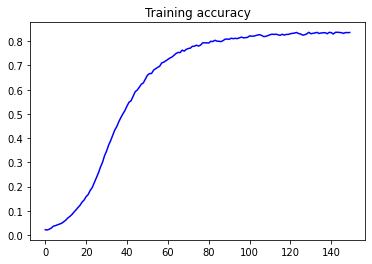

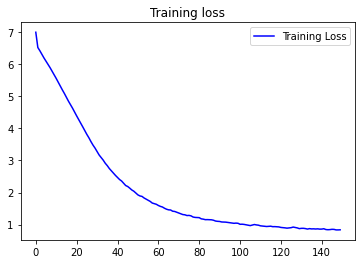

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "where did you sleep last night"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_length-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

where did you sleep last night for love doth groan of none false lie on true
